# ЗАДАЧА НА ПРАКТИКУ №1

### Требуется предоставить три программы и для каждой график, визуально показывающий решение

## Обучение с учителем (классификация). Выбрать ДВА ЛЮБЫХ СОРТА и для них реализовать.

### 1. Метод опорных векторов (SCM)

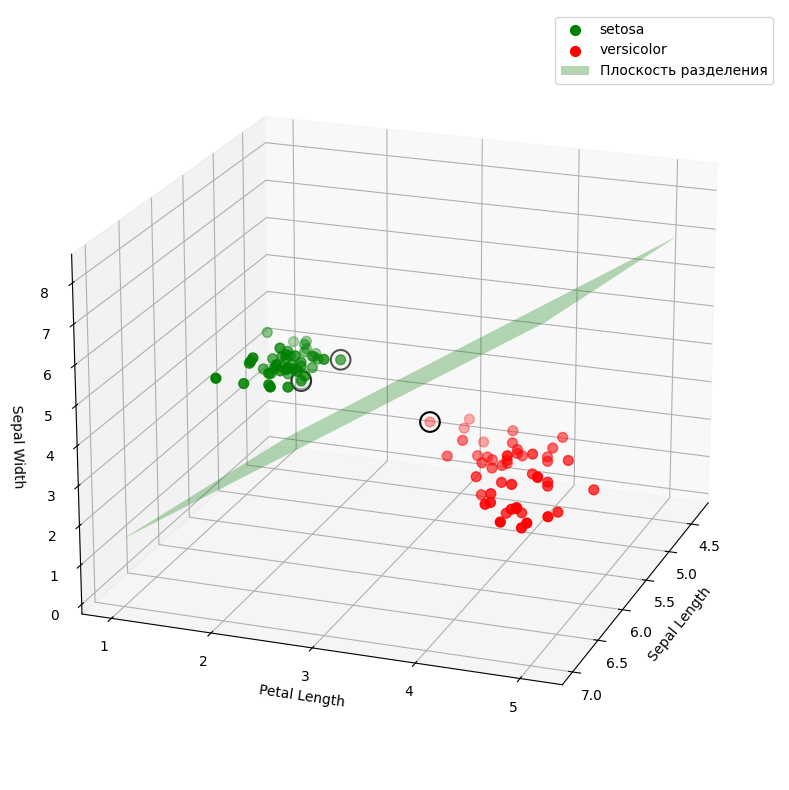

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC


iris = sns.load_dataset("iris")
data = iris[["sepal_length", "petal_length", "sepal_width", "species"]]
data_df = data[(data["species"] == "setosa") | (data["species"] == "versicolor")]


X = data_df[["sepal_length", "petal_length", "sepal_width"]]
y = data_df["species"]


data_df_setosa = data_df[data_df["species"] == "setosa"]
data_df_versicolor = data_df[data_df["species"] == "versicolor"]


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")


ax.scatter(
    data_df_setosa["sepal_length"],
    data_df_setosa["petal_length"],
    data_df_setosa["sepal_width"],
    c="green",
    label="setosa",
    s=50,
)

ax.scatter(
    data_df_versicolor["sepal_length"],
    data_df_versicolor["petal_length"],
    data_df_versicolor["sepal_width"],
    c="red",
    label="versicolor",
    s=50,
)


model = SVC(kernel="linear", C=10000)
model.fit(X, y)

# Получение параметров гиперплоскости
w = model.coef_[0]
b = model.intercept_[0]


x1 = np.linspace(X["sepal_length"].min(), X["sepal_length"].max(), 20)
x2 = np.linspace(X["petal_length"].min(), X["petal_length"].max(), 20)
X1, X2 = np.meshgrid(x1, x2)
X3 = (-w[0] * X1 - w[1] * X2 - b) / w[2]
ax.plot_surface(X1, X2, X3, alpha=0.3, color="green", label="Плоскость разделения")


ax.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    model.support_vectors_[:, 2],
    s=200,
    facecolor="none",
    edgecolor="black",
    linewidths=1.5,
)


ax.set_xlabel("Sepal Length")
ax.set_ylabel("Petal Length")
ax.set_zlabel("Sepal Width")
ax.view_init(elev=20, azim=20)
plt.legend()
plt.tight_layout()
plt.show()

## Обучение без учителя (классификация).

### 2. Метод главных компонент (PCA)

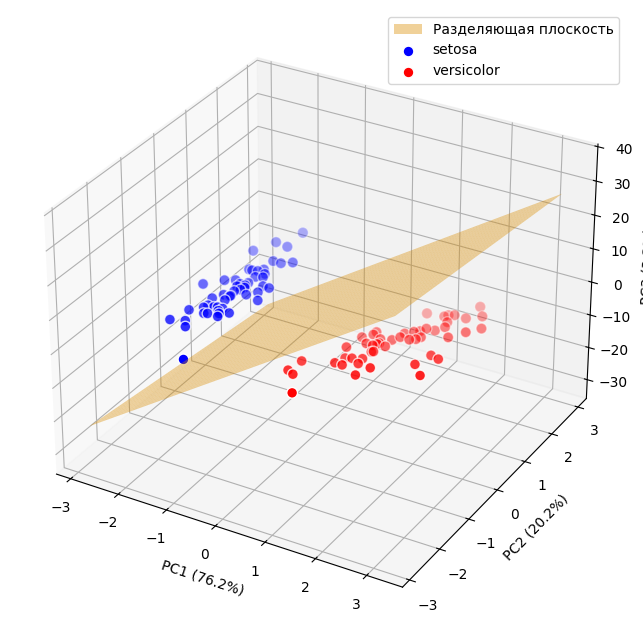

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


iris = sns.load_dataset("iris")
data = iris[iris["species"].isin(["setosa", "versicolor"])]
X = data.drop("species", axis=1)
y = data["species"].map({"setosa": 0, "versicolor": 1})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

model = LogisticRegression()
model.fit(X_pca, y)

x_min, x_max = X_pca[:, 0].min() - 0.5, X_pca[:, 0].max() + 0.5
y_min, y_max = X_pca[:, 1].min() - 0.5, X_pca[:, 1].max() + 0.5
z_min, z_max = X_pca[:, 2].min() - 0.5, X_pca[:, 2].max() + 0.5

x1, x2 = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

coef = model.coef_[0]
x3 = (-coef[0] * x1 - coef[1] * x2 - model.intercept_[0]) / coef[2]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(x1, x2, x3, alpha=0.4, color="orange", label="Разделяющая плоскость")

for cls, color in zip([0, 1], ["blue", "red"]):
    mask = y == cls
    ax.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        X_pca[mask, 2],
        c=color,
        s=60,
        label=["setosa", "versicolor"][cls],
        edgecolor="w",
    )

# Настройка оформления
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.set_zlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)")
plt.legend()
plt.show()

### 3. Метод k-ближайших соседей (KNN)

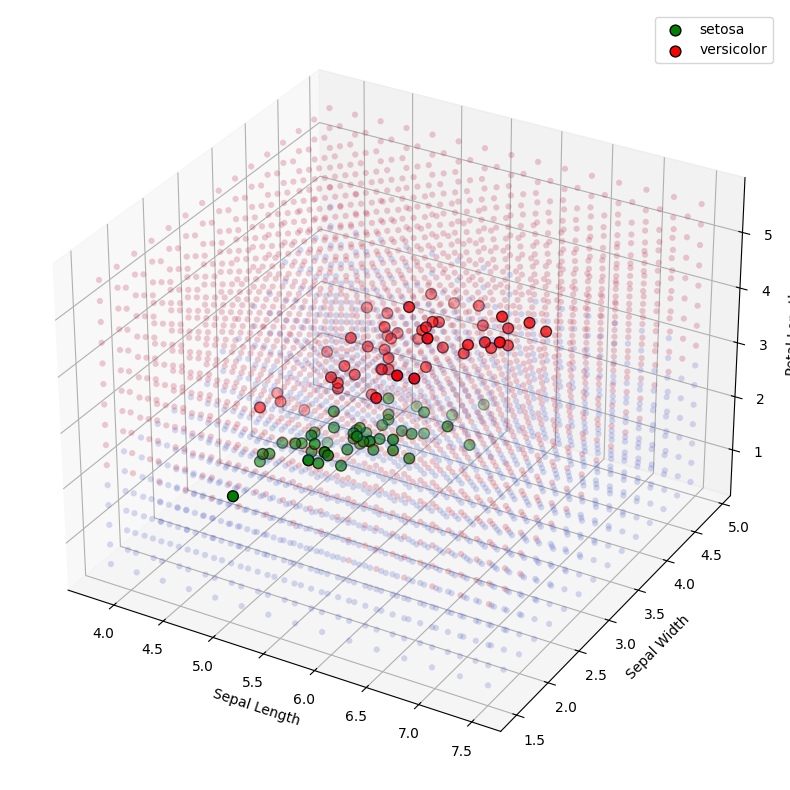

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier


iris = sns.load_dataset("iris")
data = iris[iris["species"].isin(["setosa", "versicolor"])]
X = data[["sepal_length", "sepal_width", "petal_length"]]
y = data["species"]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X.values, y)

x_min, x_max = X["sepal_length"].min() - 0.5, X["sepal_length"].max() + 0.5
y_min, y_max = X["sepal_width"].min() - 0.5, X["sepal_width"].max() + 0.5
z_min, z_max = X["petal_length"].min() - 0.5, X["petal_length"].max() + 0.5

x1, x2, x3 = np.meshgrid(
    np.linspace(x_min, x_max, 15),
    np.linspace(y_min, y_max, 15),
    np.linspace(z_min, z_max, 15),
)

# Предсказание для всей сетки
grid_points = np.c_[x1.ravel(), x2.ravel(), x3.ravel()]
Z = knn.predict(grid_points)
Z = np.where(Z == "setosa", 0, 1)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection="3d")

ax.scatter3D(
    x1.ravel(),
    x2.ravel(),
    x3.ravel(),
    c=Z,
    alpha=0.2,
    cmap="coolwarm",
    edgecolor="none",
)

colors = {"setosa": "green", "versicolor": "red"}

for species in ["setosa", "versicolor"]:
    mask = data["species"] == species
    ax.scatter3D(
        data[mask]["sepal_length"],
        data[mask]["sepal_width"],
        data[mask]["petal_length"],
        c=colors[species],
        s=60,
        label=species,
        depthshade=True,
        edgecolor="k",
    )

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
plt.legend()
plt.show()